# Dogs and Cats

<img src='https://images.pexels.com/photos/1909802/pexels-photo-1909802.jpeg?auto=compress&cs=tinysrgb&dpr=3&h=750&w=1260' style="height: 400px;">

Photo by [Sharon McCutcheon](https://www.pexels.com/@mccutcheon)

## Context

* Type : Computer Vision (use of CNN)
* Dataset : refer to [this Kaggle's competition](https://www.kaggle.com/c/dogs-vs-cats)

## Goal 
Classify whether images contain either a dog or a cat. 

---

In [1]:
import os, re, random
import numpy as np
import pandas as pd                       # only for the creation of a csv submission file

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

from sklearn.model_selection import train_test_split

# Data Preparation

First, we've to retrieve sorted lists of all image files in both the train & test directories

In [3]:
train_dir = '../input/train/'
test_dir = '../input/test/'

# list of all img files for both train & test dataset
train_img = [train_dir + i for i in os.listdir(train_dir)]
test_img  = [test_dir  + i for i in os.listdir(test_dir)]


# function to sort the image files based on the numeric value in each file name, credits : sarvajna

def atoi(text):
    return int(text) if text.isdigit() else text

def natural_keys(text):
    return [atoi(c) for c in re.split('(\d+)', text)]

# sort the lists
train_img.sort(key=natural_keys)
test_img.sort(key=natural_keys)
#train_img

The train folder contains 25,000 images of dogs and cats. Each image in this folder has the label as part of the filename. The test folder contains 12,500 images, named according to a numeric id. For each image in the test set, you should predict a probability that the image is a dog (1 = dog, 0 = cat).

In [4]:
train_img_nb, test_img_nb = len(train_img), len(test_img)
print('train images nb:', train_img_nb, 'vs ntest images nb:', test_img_nb)

train images nb: 25000 vs ntest images nb: 12500


Take a look at the first and last images, they are in color (so channel = 3 unlike black/white ones where channel = 1) and the size seems to be 150 x 150 px. Visualization of other few images choosen randomly :

In [ ]:
# delete;;;;;;;;;;;;;;;;;;;;;;;;;;
def read_images(one_img):
    img = cv2.imread(one_img, cv2.IMREAD_ANYCOLOR)
    img_arr = cv2.resize(img,(img_width,img_height), interpolation=cv2.INTER_CUBIC)    # resize if needed
    img_arr = img_arr / 255.0 # scaling
    return img_arr

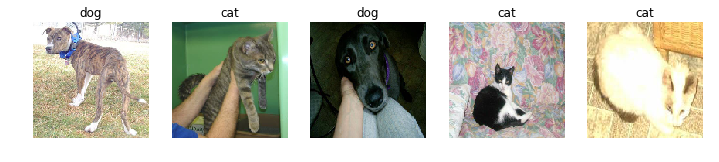

In [5]:
img_width, img_height, channels = 150, 150, 3

# display 5 randomly choosen images
plt.figure(figsize=(12, 5))

for i in range(1, 6):
    plt.subplot(1, 5, i)
    num = random.randint(0, len(train_img))
    plt.imshow(load_img(train_img[num], target_size=(img_width, img_height)))
    plt.axis('off')
    plt.title('cat')
    if 'dog' in train_img[num]:
        plt.title('dog')

plt.show()

Now let's use the openCV library to represent images in numbers, i.e read and resize the images.
We are in a case supervised learning classification, so we also have to generate labels for the train set.


In [ ]:
# delete :::::::::::::::::::::::
X, y = [], []   # creation of 2 arrays, X for img, and y for labels
    
for img in train_img:
    if 'cat' in img:
        y.append(0)
    elif 'dog' in img:
        y.append(1)
    X.append(cv2.resize(cv2.imread(img), (img_width, img_height), interpolation=cv2.INTER_CUBIC))

X, y = np.array(X), np.array(y)
X.shape, y.shape

In [16]:
X = np.empty(shape=[train_img_nb, img_width, img_height, channels])
y = np.zeros(shape=[train_img_nb])

for i in range(0, train_img_nb):
    
    # fill the target array
    if 'dog' in train_img[i]:
        y[i] = 1
    
    # fill the feature array
    img = load_img(train_img[i], target_size=(img_width, img_height))
    X[i] = img_to_array(img)

X.shape, y.shape

KeyboardInterrupt: 

In [7]:
X_0 = img_to_array(load_img(train_img[0], target_size=(img_width, img_height)))
X_24999 = img_to_array(load_img(train_img[24999], target_size=(img_width, img_height)))
X_0.shape, X_24999.shape

((150, 150, 3), (150, 150, 3))

In [12]:
X_0

array([[[203., 164.,  87.],
        [209., 170.,  93.],
        [209., 170.,  93.],
        ...,
        [247., 206., 124.],
        [244., 204., 119.],
        [240., 201., 122.]],

       [[203., 164.,  87.],
        [209., 170.,  93.],
        [209., 170.,  93.],
        ...,
        [245., 207., 124.],
        [245., 204., 122.],
        [240., 201., 122.]],

       [[203., 164.,  87.],
        [209., 170.,  93.],
        [209., 170.,  93.],
        ...,
        [247., 209., 128.],
        [244., 206., 125.],
        [242., 203., 124.]],

       ...,

       [[158., 124.,  53.],
        [159., 125.,  54.],
        [160., 126.,  55.],
        ...,
        [  3.,   4.,   0.],
        [  3.,   4.,   0.],
        [  2.,   2.,   0.]],

       [[154., 123.,  56.],
        [155., 124.,  57.],
        [158., 127.,  60.],
        ...,
        [  2.,   2.,   0.],
        [  2.,   2.,   0.],
        [  2.,   2.,   0.]],

       [[152., 121.,  54.],
        [153., 122.,  55.],
        [157., 1

In [9]:
X = np.empty(shape=[train_img_nb, img_width, img_height, channels])
X.shape

(25000, 150, 150, 3)

In [13]:
X[0] = X_0

In [14]:
X

array([[[[203., 164.,  87.],
         [209., 170.,  93.],
         [209., 170.,  93.],
         ...,
         [247., 206., 124.],
         [244., 204., 119.],
         [240., 201., 122.]],

        [[203., 164.,  87.],
         [209., 170.,  93.],
         [209., 170.,  93.],
         ...,
         [245., 207., 124.],
         [245., 204., 122.],
         [240., 201., 122.]],

        [[203., 164.,  87.],
         [209., 170.,  93.],
         [209., 170.,  93.],
         ...,
         [247., 209., 128.],
         [244., 206., 125.],
         [242., 203., 124.]],

        ...,

        [[158., 124.,  53.],
         [159., 125.,  54.],
         [160., 126.,  55.],
         ...,
         [  3.,   4.,   0.],
         [  3.,   4.,   0.],
         [  2.,   2.,   0.]],

        [[154., 123.,  56.],
         [155., 124.,  57.],
         [158., 127.,  60.],
         ...,
         [  2.,   2.,   0.],
         [  2.,   2.,   0.],
         [  2.,   2.,   0.]],

        [[152., 121.,  54.],
       

In [ ]:
X = np.empty(shape=[train_img_nb, img_width, img_height, channels])
X.shape

In [ ]:
X = np.append(X, [X_0], axis=0)

In [ ]:
sns.countplot(y)

The two classes seems to have the same nb of images for both categories and therefore are balanced.

Last, we've to split the train data set into 2 parts : a training set & a validation one. They will be used later to compute the accuracy and loss on the validation set while fitting the model using training set.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [ ]:
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
batch_size = 32

----

# Model Evaluation

We're going to build a Convolutional Neural Network (CNN).

## Theory
Summary from this source : [towardsdatascience@_sumitsaha_](https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53) 
<img src='https://cdn-images-1.medium.com/max/1800/1*vkQ0hXDaQv57sALXAJquxA.jpeg' style="height: 200px;">
A Convolutional Neural Network (ConvNet/CNN) is a Deep Learning algorithm which can take in an input image, assign importance (learnable weights and biases) to various aspects/objects in the image and be able to differentiate one from the other. The pre-processing required in a ConvNet is much lower as compared to other classification algorithms. While in primitive methods filters are hand-engineered, with enough training, ConvNets have the ability to learn these filters/characteristics.

A ConvNet is able __to successfully capture the Spatial and Temporal dependencies in an image__ through the application of relevant filters. The architecture performs a better fitting to the image dataset due to the reduction in the number of parameters involved and reusability of weights. In other words, the network can be trained to understand the sophistication of the image better.

A CNN is sequence of convolution layers pooling layers between, finished by a fully connected layer.

<img src='https://cdn-images-1.medium.com/max/900/1*15yDvGKV47a0nkf5qLKOOQ.png' style="height: 200px;">
 The role of the ConvNet is to reduce the RGB images into a form which is easier to process, without losing features which are critical for getting a good prediction.
 
__Convolution Layer — The Kernel__
 <img src='https://cdn-images-1.medium.com/max/1200/1*ciDgQEjViWLnCbmX-EeSrA.gif' style="height: 200px;">
 The filter or kernel moves to the right with a certain Stride Value till it parses the complete width. Moving on, it hops down to the beginning (left) of the image with the same Stride Value and repeats the process until the entire image is traversed.

<img src='https://cdn-images-1.medium.com/max/900/1*nYf_cUIHFEWU1JXGwnz-Ig.gif' style="height: 200px;">

 The objective of the Convolution Operation is to extract the high-level features such as edges, from the input image. ConvNets need not be limited to only one Convolutional Layer. Conventionally, the first ConvLayer is responsible for capturing the Low-Level features such as edges, color, gradient orientation, etc. With added layers, the architecture adapts to the High-Level features as well, giving us a network which has the wholesome understanding of images in the dataset, similar to how we would.
 
 __Pooling Layer__
 
 <img src='https://cdn-images-1.medium.com/max/900/1*nYf_cUIHFEWU1JXGwnz-Ig.gif' style="height: 200px;">
 
 Similar to the Convolutional Layer, the Pooling layer is responsible for reducing the spatial size of the Convolved Feature. This is to decrease the computational power required to process the data through dimensionality reduction. Furthermore, it is useful for extracting dominant features which are rotational and positional invariant, thus maintaining the process of effectively training of the model.
 
  <img src='https://cdn-images-1.medium.com/max/900/1*uoWYsCV5vBU8SHFPAPao-w.gif' style="height: 200px;">
  
  __Classification — Fully Connected Layer__
  
 Adding a Fully-Connected layer is a (usually) cheap way of learning non-linear combinations of the high-level features as represented by the output of the convolutional layer. The Fully-Connected layer is learning a possibly non-linear function in that space.

  <img src='https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/35_blog_image_27.png' style="height: 200px;">

Now that we have converted our input image into a suitable form for our Multi-Level Perceptron, we shall flatten the image into a column vector. The flattened output is fed to a feed-forward neural network and backpropagation applied to every iteration of training. Over a series of epochs, the model is able to distinguish between dominating and certain low-level features in images and classify them using the Softmax Classification technique in case of mutiple class. Here we'll use the sigmoid activation function for a binray classification task.

## Model architecture

In [ ]:
def create_model():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(img_width, img_height, channels)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Layer C3
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2)))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(units=120, activation='relu'))
    # Layer F6
    model.add(Dense(units=84, activation='relu'))
    # Output layer
    model.add(Dense(units=1, activation = 'sigmoid'))
    
    return model

In [ ]:
model = create_model()
print(model.summary())

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy']) # rmsprop ?

# Define the callbacks
callbacks = [EarlyStopping(monitor='val_loss', patience=5),
            TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

> ## Model training

Since data is huge and might not fit in your computer memory, use keras `ImageDataGenerator` and `fit_generator` to train your model on the data. This is a case where the `fit_generator` becomes really useful.

In [ ]:
# augmentation configuration used for training and validation

train_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

val_datagen = ImageDataGenerator(
    rescale = 1./255.0,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)

# prepare of generators for training and validation sets

train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
validation_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=15,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        callbacks=callbacks)

In [ ]:
# saving model and it's weights
model.save_weights('model_weights.h5')
model.save('model_keras.h5')

## Performances estimation

After several tries, i've changed a little bit the architecture of the model (the number of layers and/or the number of units), the hyperparameters, and used data augmentation in order to improve the results. When it comes to estimate this model's performances, we can see that:
* the loss has decreased from 0.58 to 0.31
* the accuracy has increased from 0.68 to 0.86, while the accuracy on the validation dataset has changed from 0.72 to 0.81. This mean that the model has learnt and is able to generalize on another dataset.

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
epochs = range(1,len(acc)+1)
plt.plot(epochs,acc,'bo',label = 'Training acc')
plt.plot(epochs,val_acc,'b',label = 'Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure()
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo',label = 'Training loss')
plt.plot(epochs,val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

# Submission

In [ ]:
X_test = [] 
    
for img in test_img:
    X_test.append(cv2.resize(cv2.imread(img), (img_width, img_height), interpolation=cv2.INTER_CUBIC))

In [ ]:
X_test = np.array(X_test)
y_test = np.zeros(X_test.shape[0])
X_test.shape, y_test.shape

In [ ]:
# augmentation configuration we will use for testing. Only rescaling.
test_datagen = ImageDataGenerator(rescale=1. / 255)

# preparation of the generator for the test dataset
test_generator = val_datagen.flow(X_test, batch_size=batch_size)

# create a df with predictions probabilities
predictions_proba = model.predict_generator(test_generator, verbose=1)
df_submission = pd.DataFrame({'id': range(1, len(test_images_dogs_cats) + 1), 'label': list(predictions_proba)}) 

In [ ]:
# change the label
df_submission['label'] = df_submission['label'].str.lstrip('[').str.rstrip(']')
df_submission['label'] = df_submission['label'].astype(float)

# generate a csv file
df_submission.to_csv("dogs-vs-cats.csv", index=False)

In [ ]:
# display 5 randomly choosen images with predictions
plt.figure(figsize=(12, 5))

for i in range(1, 6):
    plt.subplot(1, 5, i)
    num = random.randint(0, len(test_img))
    plt.imshow(read_images(test_img[num]))
    
    pred = df_submission.iloc[num, 1]
    if predictions[i, 0] >= 0.5: 
        plt.title('{:.2%} sure this is a Dog'.format(pred))
        print()
    else:
        plt.title('{:.2%} sure this is a Cat'.format(1-pred))

plt.show()